In [82]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
data_wine=pd.read_csv('./winequality-white.csv',delimiter=";")

In [12]:
data_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


(array([   20.,   163.,     0.,  1457.,     0.,  2198.,   880.,     0.,
          175.,     5.]),
 array([ 3. ,  3.6,  4.2,  4.8,  5.4,  6. ,  6.6,  7.2,  7.8,  8.4,  9. ]),
 <a list of 10 Patch objects>)

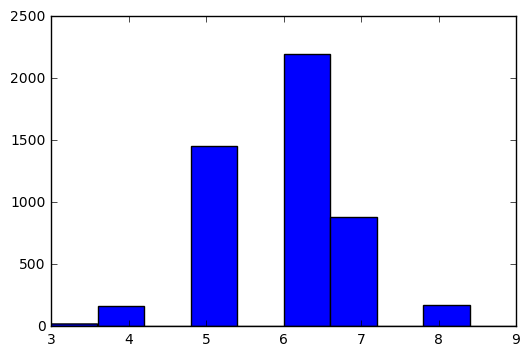

In [13]:
plt.hist(data_wine['quality'])

In [ ]:
# data_wine.groupby('quality').mean()

# ACP

In [ ]:
pca = PCA(n_components=2)
acp=pca.fit(data_wine)
X_tmp=pca.transform(data_wine)
pca.explained_variance_ratio_

In [ ]:
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30,data_norm['Clust_Kmeans'])
plt.show()

# Normalisation des valeurs dans notre base


In [92]:
#on doit penser à normaliser les données pour avoir de meilleur résultats 
#data_norm=(data_wine-data_wine.min())/(data_wine.max()-data_wine.min())
data_norm=data_wine

In [93]:
data_norm.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


# CAH

In [94]:
#générer la matrice des liens
Z = linkage(data_norm.iloc[:,:11],method='ward',metric='euclidean')
#pour ne pas prendre la variable quality

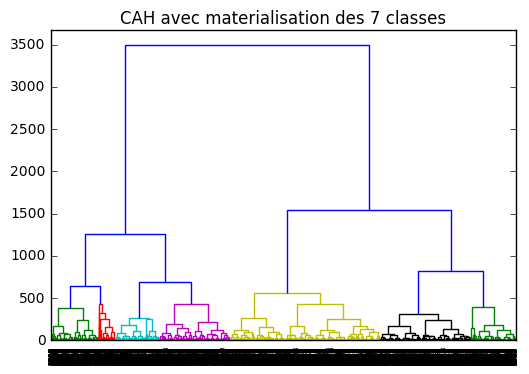

In [97]:
plt.title('CAH avec materialisation des 7 classes')
dendrogram(Z,labels=data_norm.iloc[:,:11].index,orientation='top',color_threshold=600)
plt.show()

In [98]:
groupes_cah = fcluster(Z,t=600,criterion='distance')
md=pd.Series(groupes_cah)
data_norm['Clust_CAH']=md
data_norm.groupby('Clust_CAH').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Clust_CAH,,,,,,,,,,,,
1,6.959681,0.288842,0.360339,9.923752,0.053705,54.156687,197.535928,0.996575,3.175170,0.511357,9.575449,5.556886
2,7.008284,0.313343,0.378107,10.739053,0.048402,62.286982,237.000000,0.997114,3.155740,0.520533,9.485799,5.426036
3,6.738105,0.251716,0.354105,8.370000,0.049699,57.308421,156.952632,0.995131,3.185137,0.492695,10.085158,5.901053
4,7.058593,0.298099,0.342963,7.779229,0.050432,33.386333,173.004060,0.995442,3.193342,0.503911,10.036085,5.664411
5,6.813982,0.279004,0.325536,5.926982,0.044536,31.501585,130.124604,0.993682,3.194052,0.485574,10.644386,5.978440
6,6.766317,0.260346,0.321480,4.088615,0.041151,27.193075,101.436516,0.992234,3.196474,0.478793,11.186236,6.156348
7,6.803099,0.283471,0.312087,3.203616,0.038804,16.101240,71.061983,0.991726,3.173492,0.468285,11.249346,5.795455


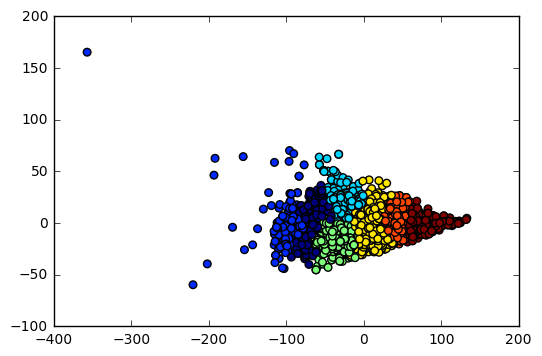

In [99]:
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30,data_norm['Clust_CAH'])
plt.show()

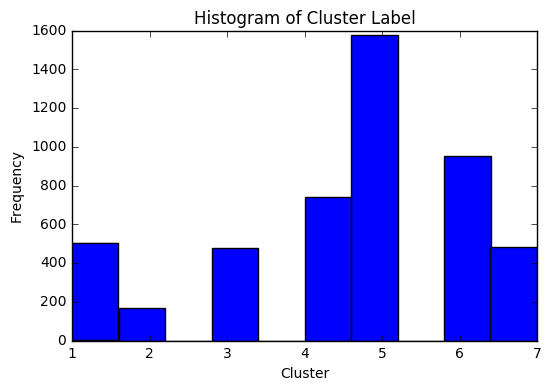

In [111]:
plt.hist(data_wine['Clust_CAH'])
plt.title('Histogram of Cluster Label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Hiearchical clustering

In [100]:
model_AggloClust = AgglomerativeClustering(n_clusters=7, linkage='ward')
ward=model_AggloClust.fit(data_norm)
md=pd.Series(ward.labels_)
data_norm['Clust_Hiearchical']=md

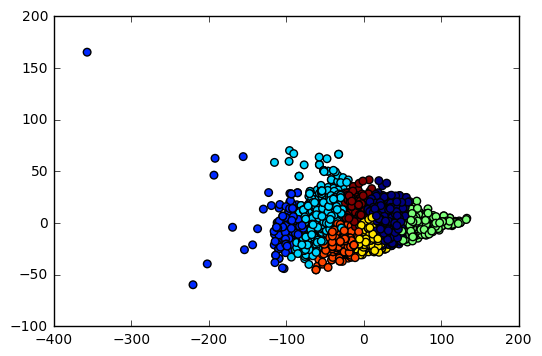

In [102]:
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30,data_norm['Clust_Hiearchical'])
plt.show()

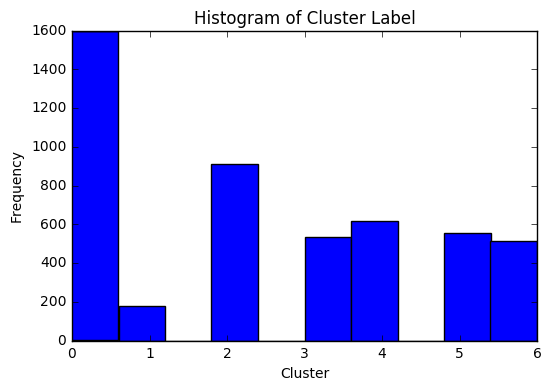

In [101]:
plt.hist(md)
plt.title('Histogram of Cluster Label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# K-means Clustering

In [103]:
model_KMEans=KMeans(n_clusters=7)
model_KMEans.fit(data_norm.iloc[:,:11]) #pour ne pas prendre la variable quality et la variable qu'on a crée pour Hiearchical Clustering

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [104]:
md=pd.Series(model_KMEans.labels_)
data_norm['Clust_Kmeans']=md

In [114]:
data_norm.groupby('Clust_Kmeans').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clust_CAH,Clust_Hiearchical
Clust_Kmeans,,,,,,,,,,,,,,
0,6.826661,0.279432,0.325913,5.631791,0.043810,29.739697,126.764087,0.993457,3.189941,0.484121,10.736765,6.015139,5.054668,1.890664
1,7.098680,0.304183,0.344175,7.477723,0.050746,29.344884,166.419142,0.995301,3.185990,0.499620,10.097827,5.686469,4.110561,4.754125
2,6.745852,0.253941,0.346696,7.558296,0.047653,50.222963,149.541481,0.994634,3.203007,0.486519,10.280049,5.977778,3.847407,5.105185
3,6.746584,0.265493,0.319478,4.242362,0.041357,26.516603,100.667932,0.992306,3.193776,0.478055,11.150427,6.097723,5.958254,0.318786
4,6.896904,0.281029,0.352570,9.332817,0.051464,53.558824,187.318885,0.996153,3.182678,0.510155,9.706914,5.592879,2.153251,2.013932
5,7.036304,0.309010,0.361419,10.294224,0.051832,55.136964,227.123762,0.996981,3.172145,0.526733,9.526403,5.524752,1.554455,1.412541
6,6.833647,0.281953,0.312400,3.190588,0.039162,15.625882,68.816471,0.991776,3.169741,0.469294,11.211373,5.748235,6.990588,2.971765


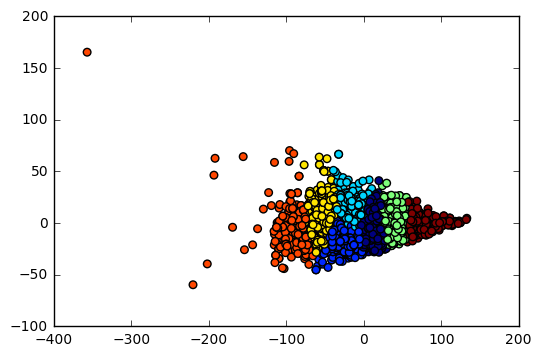

In [115]:
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30,data_norm['Clust_Kmeans'])
plt.show()

In [116]:
#recuperer l'indice de la valeur abérante 
X_df=pd.DataFrame(X_tmp)
X_df[X_df[0]< -300]
#suppression de la valeur aberrante
data_wine_tmp=data_norm.drop(4745)
data_wine_tmp=data_wine_tmp.reset_index(drop=True)
#verification : comparer la dimension des DF avant/apres suppression de la valeur aberrante 
print(data_norm.shape)
print(data_wine_tmp.shape)


(4898, 15)
(4897, 15)


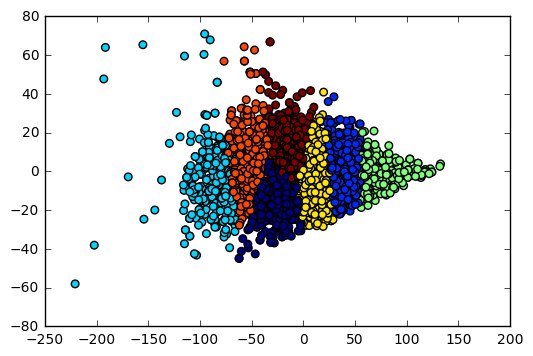

In [120]:
pca = PCA(n_components=2)
acp=pca.fit(data_wine_tmp)
X_tmp=pca.transform(data_wine_tmp)
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_wine_tmp)
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30, kmeans.labels_)
plt.show()

In [107]:
print('accuracy score for the K-means CLustering Methode:')
print(accuracy_score(data_wine['quality'],data_norm['Clust_Kmeans']))
print('accuracy score for the Hiearchical CLustering Methode:')
print(accuracy_score(data_wine['quality'],data_norm['Clust_Hiearchical']))


accuracy score for the K-means CLustering Methode:
0.0683952633728
accuracy score for the Hiearchical CLustering Methode:
0.0945283789302


In [108]:
print('J-score for K-means')
print(model_KMEans.inertia_)

J-score for K-means
1375642.31626


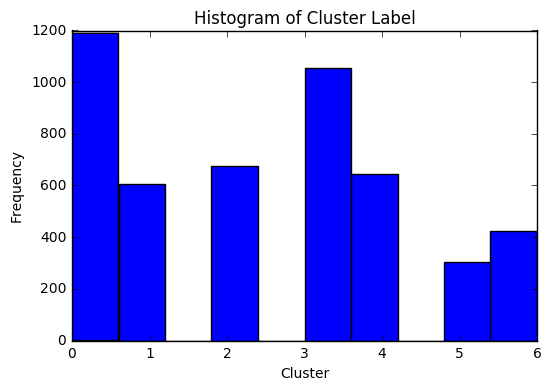

In [121]:
plt.hist(data_norm['Clust_Kmeans'])
plt.title('Histogram of Cluster Label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

In [110]:
data_norm.groupby('Clust_Hiearchical').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clust_CAH,Clust_Kmeans
Clust_Hiearchical,,,,,,,,,,,,,,
0,6.737673,0.265414,0.322635,4.903890,0.042044,29.890841,109.744981,0.992700,3.190439,0.480903,11.020274,6.122961,5.567127,1.803011
1,6.997753,0.311826,0.376404,10.905337,0.048860,59.345506,235.789326,0.997207,3.153596,0.517640,9.427528,5.528090,1.898876,5.000000
2,6.916575,0.280258,0.357728,9.597914,0.051827,53.445664,187.343030,0.996288,3.184292,0.512580,9.700732,5.607025,2.166850,3.785950
3,6.827392,0.281801,0.313152,3.392308,0.039032,16.570356,72.804878,0.991841,3.173884,0.467899,11.228111,5.834897,6.908068,5.369606
4,6.927715,0.291750,0.324473,5.598298,0.045585,25.239870,135.576985,0.993879,3.192139,0.488509,10.517823,5.820097,4.990276,0.188006
5,7.112094,0.307491,0.341697,7.124097,0.050717,29.660650,167.263538,0.995160,3.192004,0.497130,10.145578,5.671480,4.066787,1.066787
6,6.721722,0.251223,0.339119,7.034247,0.047431,49.321918,146.765166,0.994261,3.206928,0.484149,10.415590,6.056751,3.935421,1.927593


# ACP (Pour une meilleur visualisation des cluster creer )

In [79]:
pca = PCA(n_components=2)
acp=pca.fit(data_wine)
X_tmp=pca.transform(data_wine)
pca.explained_variance_ratio_

array([ 0.90933123,  0.07931411])

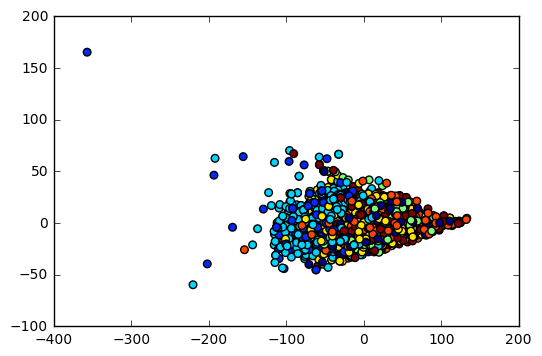

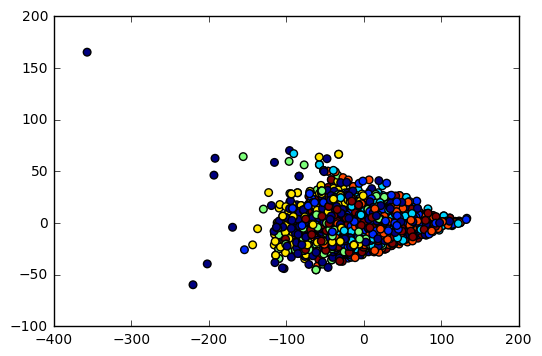

In [76]:
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30,data_norm['Clust_Kmeans'])
plt.show()
plt.scatter(X_tmp[:,0], X_tmp[:,1], 30,data_norm['Clust_Hiearchical'])
plt.show()